In [521]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [522]:
'''
Константа золотого сечения
'''
K = (3 - np.sqrt(5)) / 2

In [523]:
'''
Заданная функция и отрезок минимизации с точностью минимизации
'''
def function(x):
    return (np.exp(np.sin(x))) * (x ** 2)


### Метод парабол


In [524]:
def parabola_minimization(left, right, eps, func):
    x = (right + left) / 2
    f_left = func(left)
    f_right = func(right)
    f_x = func(x)
    calls = 3
    parabola_segments.loc[len(parabola_segments)] = [left, right, right - left]

    while right - left > eps:
        dividend = (((x - left)**2) * (f_x - f_right) - ((x - right)**2) * (f_x - f_left))
        divisor = (2 * ((x - left) * (f_x - f_right) - (x - right) * (f_x - f_left)))
        u = x - np.divide(dividend, divisor)
        if np.isnan(u) or len(parabola_segments) > 10000:
            break
        if u == x:
            return u, calls
        f_u = func(u)
        calls += 1

        if x < u:
            if f_x < f_u:
                right = u
                f_right = f_u
            else:
                left = x
                f_left = f_x
                x = u
                f_x = f_u
        else:
            if f_u < f_x:
                right = x
                f_right = f_x
                x = u
                f_x = f_u
            else:
                left = u
                f_left = f_u
        parabola_segments.loc[len(parabola_segments)] = [left, right, right - left]
    return (right + left) / 2, calls

(0.0, 300)


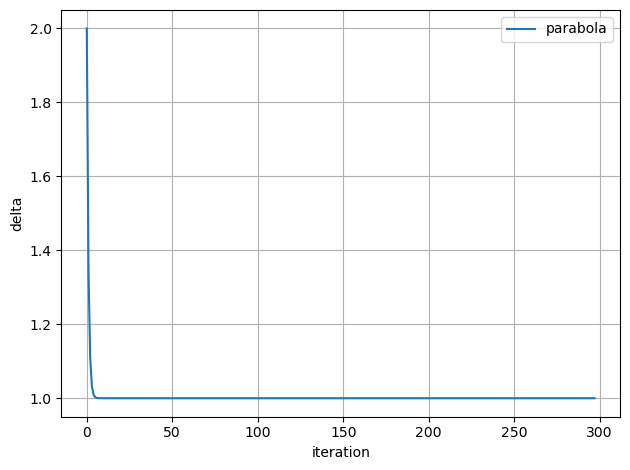

,left,right,length
iteration,,,
0,-1.000000e+00,1.0,2.000000
1,-3.432937e-01,1.0,1.343294
2,-1.074450e-01,1.0,1.107445
3,-3.160404e-02,1.0,1.031604
4,-9.082146e-03,1.0,1.009082
...,...,...,...
293,-1.489392e-160,1.0,1.000000
294,-4.237025e-161,1.0,1.000000
295,-1.203879e-161,1.0,1.000000


In [539]:
parabola_segments = pd.DataFrame({"left": [], "right": [], "length": []})
parabola_segments.index.name = "iteration"
print(parabola_minimization(-1, 1, 0.1, function))
parabola_segments

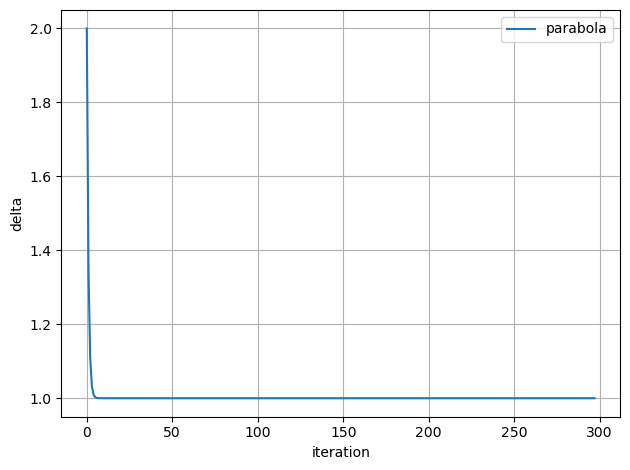

In [536]:
plt.plot(parabola_segments.index, parabola_segments["length"], label="parabola")
plt.ylabel('delta')
plt.xlabel('iteration')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

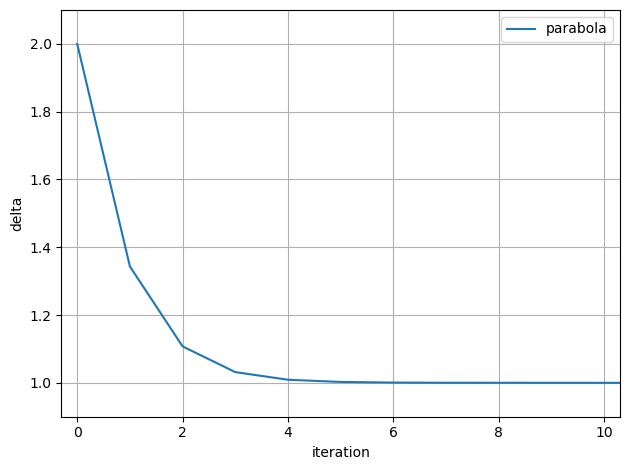

In [527]:
plt.plot(parabola_segments.index, parabola_segments["length"], label="parabola")
plt.ylabel('delta')
plt.xlabel('iteration')
plt.legend()
plt.grid()
plt.xlim(-0.3, 10.3)
plt.ylim(0.9, 2.1)
plt.tight_layout()
plt.show()

### Исправленный метод парабол

In [528]:
def parabola_minimization_fixed(left, right, eps, func):
    x = (right + left) / 2
    f_left = func(left)
    f_right = func(right)
    f_x = func(x)
    calls = 3
    parabola_fixed_segments.loc[len(parabola_fixed_segments)] = [left, right, right - left]

    while right - left > eps:
        if (x - left) / (right - left) < 0.00001:
            u = x + (right - x) / 4
        elif (right - x) / (right - left) < 0.00001:
            u = x - (x - left) / 4
        else:
            dividend = (((x - left)**2) * (f_x - f_right) - ((x - right)**2) * (f_x - f_left))
            divisor = (2 * ((x - left) * (f_x - f_right) - (x - right) * (f_x - f_left)))
            u = x - np.divide(dividend, divisor)
            if np.isnan(u) or len(parabola_fixed_segments) > 10000:
                break
            if u == x:
                #u = (left + right) / 2
                return u, calls
        f_u = func(u)
        calls += 1

        if x < u:
            if f_x < f_u:
                right = u
                f_right = f_u
            else:
                left = x
                f_left = f_x
                x = u
                f_x = f_u
        else:
            if f_u < f_x:
                right = x
                f_right = f_x
                x = u
                f_x = f_u
            else:
                left = u
                f_left = f_u
        parabola_fixed_segments.loc[len(parabola_fixed_segments)] = [left, right, right - left]
    return (right + left) / 2, calls

In [529]:
parabola_fixed_segments = pd.DataFrame({"left": [], "right": [], "length": []})
parabola_fixed_segments.index.name = "iteration"
print(parabola_minimization_fixed(-1, 1, 0.1, function))
parabola_fixed_segments

(0.031249735234478375, 16)


,left,right,length
iteration,,,
0,-1.000000e+00,1.0000,2.000000
1,-3.432937e-01,1.0000,1.343294
2,-1.074450e-01,1.0000,1.107445
3,-3.160404e-02,1.0000,1.031604
4,-9.082146e-03,1.0000,1.009082
5,-2.591171e-03,1.0000,1.002591
6,-7.377130e-04,1.0000,1.000738
7,-2.099019e-04,1.0000,1.000210
8,-5.971321e-05,1.0000,1.000060


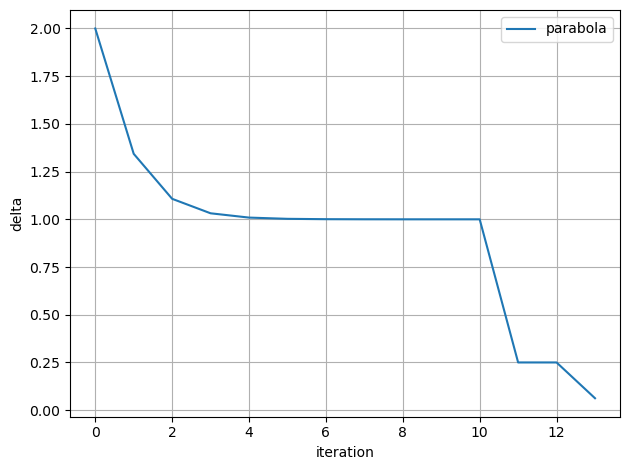

In [530]:
plt.plot(parabola_fixed_segments.index, parabola_fixed_segments["length"], label="parabola")
plt.ylabel('delta')
plt.xlabel('iteration')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### Комбинированный метод Брента


In [531]:
def brent_minimization(left, right, eps, func):
    x = w = v = (left + right) / 2
    f_x = f_w = f_v = func(x)
    calls = 1
    d = e = right - left
    is_parabola: bool
    u: float
    brent_segments.loc[len(brent_segments)] = [left, right, right - left]

    while d > eps:
        is_parabola = False
        g = e
        e = d
        if not (x == w or x == v or w == v or f_x == f_w or f_x == f_v or f_v == f_w):
            u = w - (((w - x)**2) * (f_w - f_v) - ((w - v)**2) * (f_w - f_x)) / (2 * ((w - x) * (f_w - f_v) - (w - v) * (f_w - f_x)))
            if left + eps <= u <= right - eps and abs(u - x) < g / 2:
                is_parabola = True
                d = abs(u - x)
        if not is_parabola:
            if x < (right - left) / 2:
                u = x + K * (right - x)
                d = right - x
            else:
                u = x - K * (x - left)
                d = x - left
            if abs(u - x) < eps:
                u = x + np.sign(u - x) * eps
        f_u = func(u)
        calls += 1
        if f_u <= f_x:
            if u >= x:
                left = x
            else:
                right = x
            v = w
            w = x
            x = u
            f_v = f_w
            f_w = f_x
            f_x = f_u
        else:
            if u >= x:
                right = u
            else:
                left = u
            if f_u <= f_w or w == x:
                v = w
                w = u
                f_v = f_w
                f_w = f_u
            elif f_u <= f_v or v == x or v == w:
                v = u
                f_v = f_u
        brent_segments.loc[len(brent_segments)] = [left, right, right - left]
    return x, calls

In [532]:
brent_segments = pd.DataFrame({"left": [], "right": [], "length": []})
brent_segments.index.name = "iteration"
print(brent_minimization(-10, -7, 0.1, function))
brent_segments

(-7.572949016875158, 4)


,left,right,length
iteration,,,
0,-10.000000,-7.0,3.000000
1,-8.500000,-7.0,1.500000
2,-7.927051,-7.0,0.927051
3,-7.623512,-7.0,0.623512


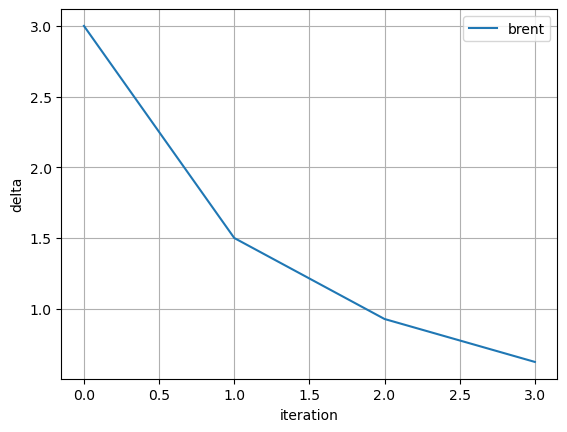

In [533]:
plt.plot(brent_segments.index, brent_segments["length"], label="brent")
plt.ylabel('delta')
plt.xlabel('iteration')
plt.legend()
plt.grid()
plt.show()